<a href="https://colab.research.google.com/github/jirayuwat12/2110211-2022-Intro-to-Data-Structure/blob/master/iot/ss3_hackathon_online_iots_and_roboticsV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Kaggle Library

In [ ]:
!pip install -q kaggle

#Mouth Google Drive

mouth your google drive account ***everytime when start VM***

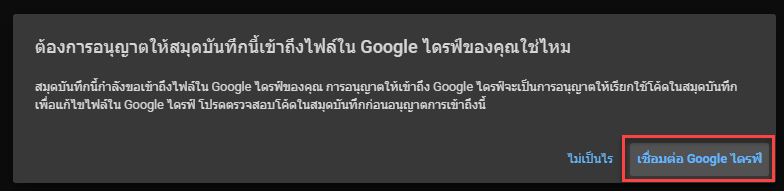

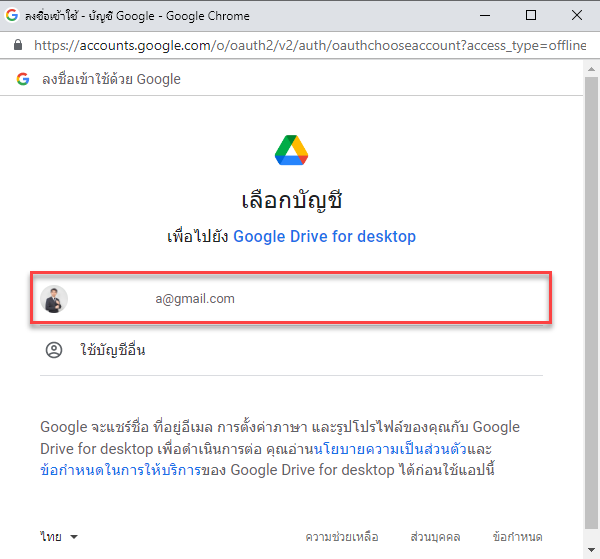

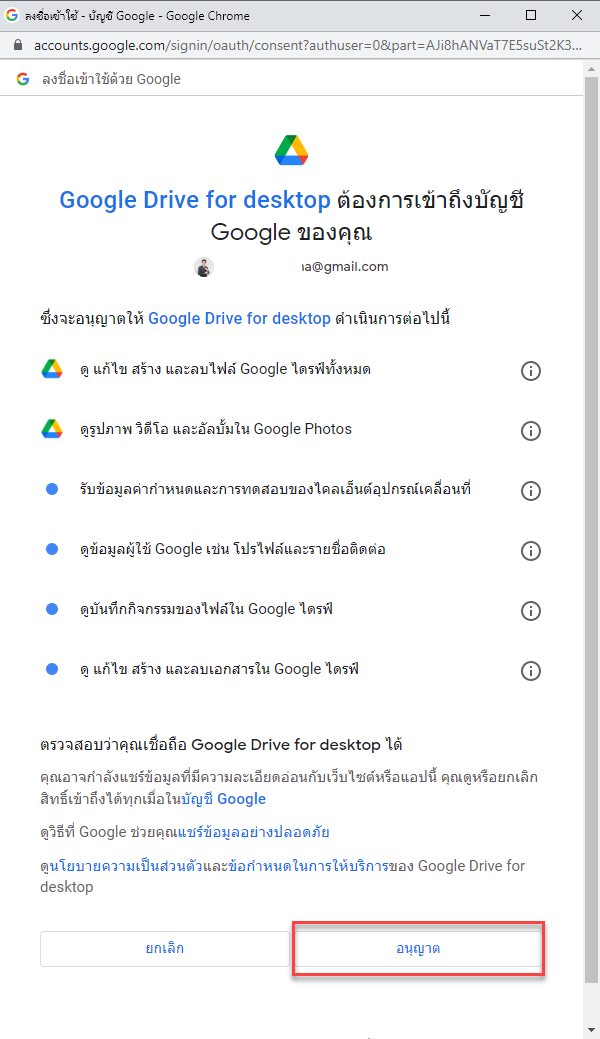

check your mount

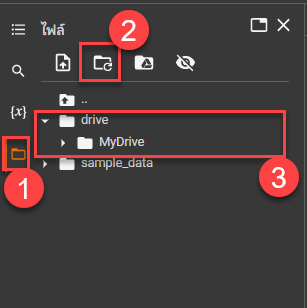

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Kaggle API

***Do only one-time at first***

1 go to https://www.kaggle.com/me/account

2 Click create New API token

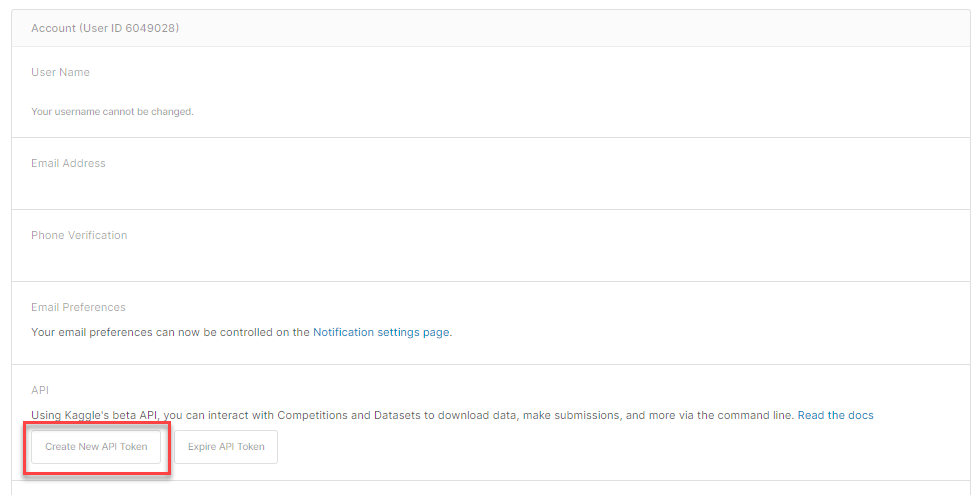


1 login to google drive and create some folder (try create "colab" folder like me)

2 copy kaagle.json which downloaded when create new API token to google drive

3 check file is existing in google drive
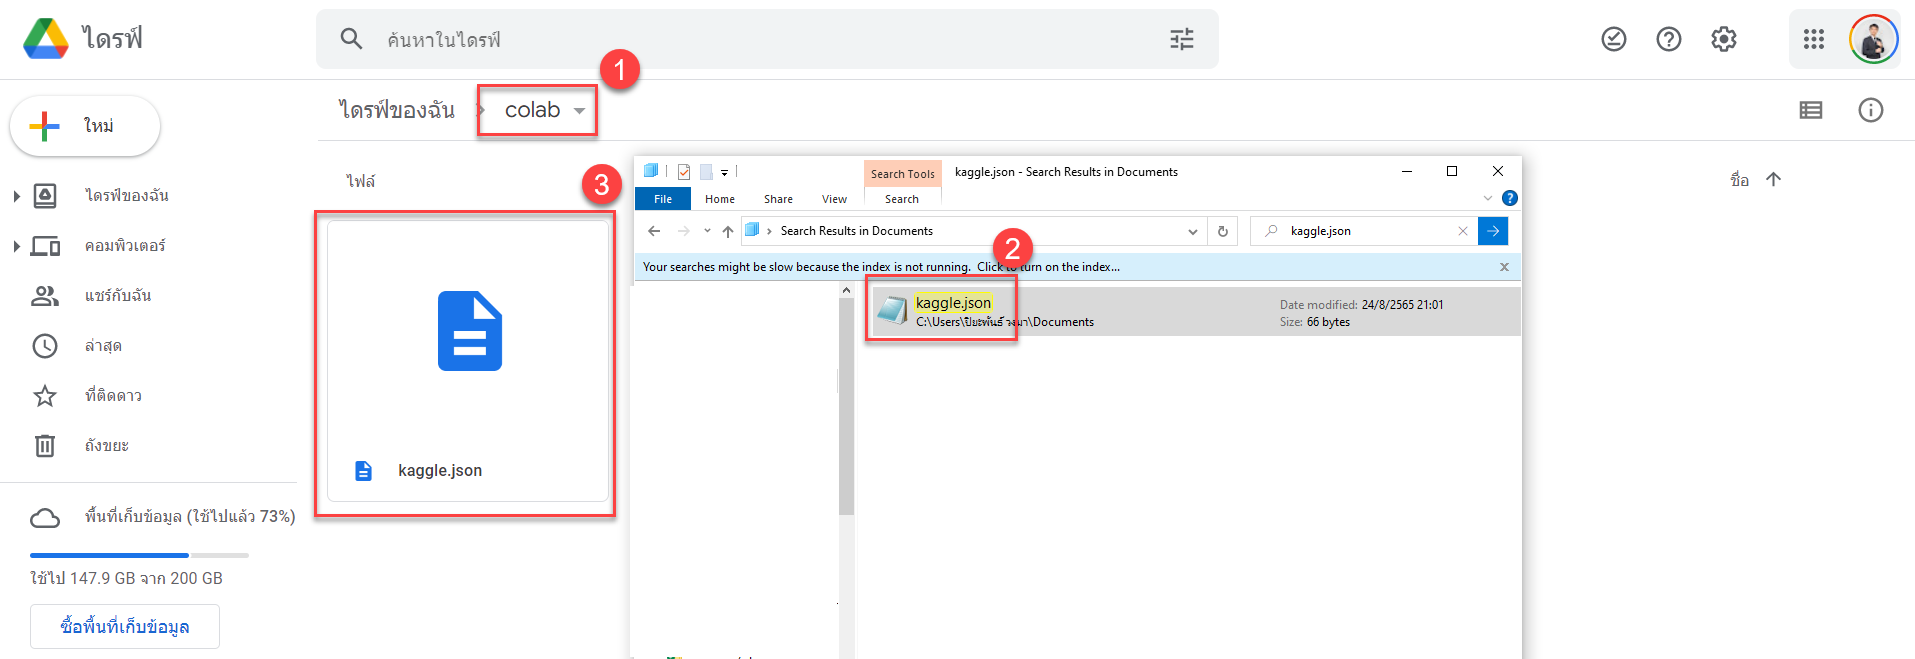

Source mount file is * /content/drive/MyDrive/colab/kaggle.json *

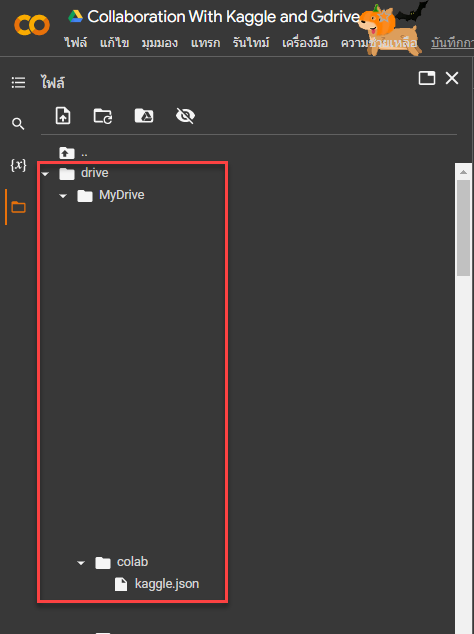

#Download Dataset from Kaggle

please join competition before runscript


https://www.kaggle.com/competitions/hackathon-online-2022-image-processing

In [ ]:
#@title enter name of competition to download dataset
competitive_name = "ss3-hackathon-online-iots-and-robotics" #@param {type:"string"}
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/colab_resources/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c {competitive_name} #download competition dataset


ref                                                             title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                  9KB  2022-10-06 08:55:25           9957        318  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset           11KB  2022-09-30 04:05:11           7960        253  1.0              
stetsondone/video-game-sales-by-genre                           Video Game Sales by Genre                        12KB  2022-10-31 17:56:01            466         23  1.0              
hasibalmuzdadid/global-air-pollution-dataset                    Global Air Pollu

#Unzip file

In [ ]:
!unzip /content/ss3-hackathon-online-iots-and-robotics.zip

Archive:  /content/ss3-hackathon-online-iots-and-robotics.zip
  inflating: IOT_Submit.csv          
  inflating: IOT_Test.csv            
  inflating: IOT_Train.csv           


In [ ]:
!ls /content/drive/MyDrive/colab_resources/

IOT  kaggle.json


In [ ]:
!mkdir /content/drive/MyDrive/colab_resources/IOT

mkdir: cannot create directory ‘/content/drive/MyDrive/colab_resources/IOT’: File exists


In [ ]:
!cp /content/*.csv /content/drive/MyDrive/colab_resources/IOT

In [ ]:
!ls /content/drive/MyDrive/colab_resources/IOT

df_clean_v1.csv  IOT_Submit.csv  IOT_Train.csv
df_clean_v2.csv  IOT_Test.csv	 submission.csv


#Process data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df_train = pd.read_csv('/content/IOT_Train.csv')

In [ ]:
df_train.columns.to_numpy().reshape(-1,1)

array([['mac'],
       ['station_name'],
       ['tambon_code'],
       ['tambon_namt'],
       ['amphur_code'],
       ['amphur_namt'],
       ['province_code'],
       ['province_namt'],
       ['latitude'],
       ['longitude'],
       ['time'],
       ['humid'],
       ['light'],
       ['pm10'],
       ['pm2.5'],
       ['rainfall'],
       ['wind_direct'],
       ['wind_speed'],
       ['temp']], dtype=object)

In [ ]:
df_train.head(5)

,mac,station_name,tambon_code,tambon_namt,amphur_code,amphur_namt,province_code,province_namt,latitude,longitude,time,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed,temp
0,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-20 15:00:00+07:00,70.6,59.0,NaN,NaN,0.0,45.0,4.3,32.6
1,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-05-16 09:00:00+07:00,62.3,76.0,NaN,NaN,0.0,45.0,1.9,37.9
2,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-06-26 19:00:00+07:00,90.3,0.0,NaN,NaN,0.0,135.0,3.2,26.4
3,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-16 04:00:00+07:00,91.7,0.0,NaN,NaN,0.0,157.5,0.0,25.6
4,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-05-30 08:00:00+07:00,59.1,71.0,NaN,NaN,0.0,180.0,2.3,36.2


In [ ]:
df_train.drop(columns = ['mac','tambon_code','tambon_namt','amphur_code','amphur_namt','province_code','province_namt','latitude','longitude'])

,station_name,time,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed,temp
0,บ้านนา_2,2022-07-20 15:00:00+07:00,70.6,59.0,NaN,NaN,0.0,45.0,4.3,32.6
1,บ้านนา_2,2022-05-16 09:00:00+07:00,62.3,76.0,NaN,NaN,0.0,45.0,1.9,37.9
2,บ้านนา_2,2022-06-26 19:00:00+07:00,90.3,0.0,NaN,NaN,0.0,135.0,3.2,26.4
3,บ้านนา_2,2022-07-16 04:00:00+07:00,91.7,0.0,NaN,NaN,0.0,157.5,0.0,25.6
4,บ้านนา_2,2022-05-30 08:00:00+07:00,59.1,71.0,NaN,NaN,0.0,180.0,2.3,36.2
...,...,...,...,...,...,...,...,...,...,...
13630,โรงเรียนหนองสูงสามัคคีวิทยา_2,2022-06-14 01:00:00+07:00,97.9,0.0,NaN,NaN,4.2,0.0,0.0,23.5
13631,โรงเรียนหนองสูงสามัคคีวิทยา_2,2022-05-03 02:00:00+07:00,80.6,0.0,NaN,NaN,0.0,135.0,2.9,19.3
13632,โรงเรียนหนองสูงสามัคคีวิทยา_2,2022-05-19 06:00:00+07:00,87.9,37.0,NaN,NaN,0.0,45.0,3.0,24.5
13633,โรงเรียนหนองสูงสามัคคีวิทยา_2,2022-06-15 02:00:00+07:00,89.9,0.0,NaN,NaN,0.0,315.0,0.0,27.3


In [ ]:
df_train = df_train.drop(columns = ['mac','tambon_code','tambon_namt','amphur_code','amphur_namt','province_code','province_namt','latitude','longitude'])

In [ ]:
def station_name_to_cat(df):
    df = df.copy()
    for unique in df['station_name'].unique():
        df['is_'+unique] = (df['station_name'] == str(unique)).astype(np.int8)
    df.pop('station_name')
    return df

def wind_direct_to_cat(df,sep=[90,180,270,360]):
    df = df.copy()
    df['is_wind_direct_Q1'] = ((df['wind_direct'] < sep[0]) & (df['wind_direct'] >= 0)).astype(np.int8)
    df['is_wind_direct_Q2'] = ((df['wind_direct'] < sep[1]) & (df['wind_direct'] >= sep[0])).astype(np.int8)
    df['is_wind_direct_Q3'] = ((df['wind_direct'] < sep[2]) & (df['wind_direct'] >= sep[1])).astype(np.int8)
    df['is_wind_direct_Q4'] = ((df['wind_direct'] < sep[3]) & (df['wind_direct'] >= sep[2])).astype(np.int8)
    df.pop('wind_direct')
    return df

def drop_pm(df):
    df = df.copy()
    df.pop('pm10')
    df.pop('pm2.5')
    return df

def norm_humid(df):
    df = df.copy()
    df['humid'] /= 100
    return df

def norm_col(df,col):
    df = df.copy()
    df[col] = (df[col] - df[col].mean()) / df[col].std()
    return df

def extract_time(df):
    df = df.copy()
    df['hour'] = pd.to_datetime(df['time']).map(lambda x : (x.hour-4+24)%24)
    # df['day'] = pd.to_datetime(df['time']).map(lambda x : int(x.strftime("%w")))
    # df['month'] = pd.to_datetime(df['time']).map(lambda x : x.month)
    df.pop('time')
    return df

def fill_pm(df):
    df.loc[df['pm10'].isnull(),'pm10'] =  np.mean(df['pm10'])
    df.loc[df['pm2.5'].isnull(),'pm2.5'] =  np.mean(df['pm2.5'])
    return df
def transform_df(df):
    df = df.copy()
    # df = norm_humid(df)
    # df = drop_pm(df)
    df = fill_pm(df)
    df = wind_direct_to_cat(df)
    df = station_name_to_cat(df)
    df = extract_time(df)
    for opt in ['light','rainfall','wind_speed','humid','hour','pm10','pm2.5']:
        df = norm_col(df,opt)
    # df.pop('wind_speed')
    return df

In [ ]:
df_train_processed = df_train.copy()
temp = df_train_processed.pop('temp')
df_train_processed = transform_df(df_train_processed)
df_train_processed['temp'] = temp
df_train_processed.info()
# fill_pm(df_train)['pm10'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13635 entries, 0 to 13634
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   humid                                    13635 non-null  float64
 1   light                                    13635 non-null  float64
 2   pm10                                     13635 non-null  float64
 3   pm2.5                                    13635 non-null  float64
 4   rainfall                                 13635 non-null  float64
 5   wind_speed                               13635 non-null  float64
 6   is_wind_direct_Q1                        13635 non-null  int8   
 7   is_wind_direct_Q2                        13635 non-null  int8   
 8   is_wind_direct_Q3                        13635 non-null  int8   
 9   is_wind_direct_Q4                        13635 non-null  int8   
 10  is_บ้านนา_2                              13635

In [ ]:
df_train_processed[df_train_processed['temp'].isnull()] = 0

In [ ]:
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13635 entries, 0 to 13634
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   humid                                    13635 non-null  float64
 1   light                                    13635 non-null  float64
 2   pm10                                     13635 non-null  float64
 3   pm2.5                                    13635 non-null  float64
 4   rainfall                                 13635 non-null  float64
 5   wind_speed                               13635 non-null  float64
 6   is_wind_direct_Q1                        13635 non-null  int8   
 7   is_wind_direct_Q2                        13635 non-null  int8   
 8   is_wind_direct_Q3                        13635 non-null  int8   
 9   is_wind_direct_Q4                        13635 non-null  int8   
 10  is_บ้านนา_2                              13635

In [ ]:
df_train_processed

,humid,light,pm10,pm2.5,rainfall,wind_speed,is_wind_direct_Q1,is_wind_direct_Q2,is_wind_direct_Q3,is_wind_direct_Q4,is_บ้านนา_2,is_บ้านนาสะแบง_2,is_บ้านสำโรงเกียรติ_2,is_โรงเรียนท่าข้ามวิทยา,is_โรงเรียนบ้านนา,is_โรงเรียนสรรพวิทยาคม,is_โรงเรียนสามเสนนอก(ประชาราษฎร์อนุกูล),is_โรงเรียนหนองสูงสามัคคีวิทยา_2,hour,temp
0,-0.789867,0.747730,0.0,-1.490018e-16,-0.122106,-0.001287,1,0,0,0,1,0,0,0,0,0,0,0,-0.072988,32.6
1,-1.456913,1.240355,0.0,-1.490018e-16,-0.122106,-0.014498,1,0,0,0,1,0,0,0,0,0,0,0,-0.940137,37.9
2,0.793362,-0.961967,0.0,-1.490018e-16,-0.122106,-0.007342,0,1,0,0,1,0,0,0,0,0,0,0,0.505110,26.4
3,0.905876,-0.961967,0.0,-1.490018e-16,-0.122106,-0.024957,0,1,0,0,1,0,0,0,0,0,0,0,-1.662760,25.6
4,-1.714087,1.095465,0.0,-1.490018e-16,-0.122106,-0.012296,0,0,1,0,1,0,0,0,0,0,0,0,-1.084661,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13630,1.404151,-0.961967,0.0,-1.490018e-16,3.653613,-0.024957,1,0,0,0,0,0,0,0,0,0,0,1,1.372259,23.5
13631,0.013802,-0.961967,0.0,-1.490018e-16,-0.122106,-0.008994,0,1,0,0,0,0,0,0,0,0,0,1,1.516783,19.3
13632,0.600481,0.110216,0.0,-1.490018e-16,-0.122106,-0.008443,1,0,0,0,0,0,0,0,0,0,0,1,-1.373711,24.5
13633,0.761215,-0.961967,0.0,-1.490018e-16,-0.122106,-0.024957,0,0,0,1,0,0,0,0,0,0,0,1,1.516783,27.3


In [ ]:
df_train_processed.corr()

,humid,light,pm10,pm2.5,rainfall,wind_speed,is_wind_direct_Q1,is_wind_direct_Q2,is_wind_direct_Q3,is_wind_direct_Q4,is_บ้านนา_2,is_บ้านนาสะแบง_2,is_บ้านสำโรงเกียรติ_2,is_โรงเรียนท่าข้ามวิทยา,is_โรงเรียนบ้านนา,is_โรงเรียนสรรพวิทยาคม,is_โรงเรียนสามเสนนอก(ประชาราษฎร์อนุกูล),is_โรงเรียนหนองสูงสามัคคีวิทยา_2,hour,temp
humid,1.000000,-0.687891,0.073475,0.076905,0.081560,-0.010080,0.069135,0.055508,-0.099346,-0.017982,-0.058043,-0.090880,0.053022,0.196378,0.061231,0.063554,-0.229472,0.010528,0.157509,-0.901284
light,-0.687891,1.000000,-0.066771,-0.070359,-0.062027,0.001211,-0.047301,-0.015249,0.055426,0.003566,-0.006308,0.115222,-0.041589,-0.085083,0.046011,0.041990,-0.104305,0.030963,-0.440206,0.730441
pm10,0.073475,-0.066771,1.000000,0.997061,-0.019893,0.006281,-0.076862,0.021390,0.040058,0.015508,-0.012671,-0.280660,0.073775,-0.005606,0.156150,0.147731,-0.056066,-0.022232,-0.007601,-0.087230
pm2.5,0.076905,-0.070359,0.997061,1.000000,-0.020870,0.006676,-0.085444,0.022544,0.044474,0.018540,-0.012317,-0.302896,0.083780,-0.002863,0.158653,0.155198,-0.057344,-0.021621,-0.005106,-0.088930
rainfall,0.081560,-0.062027,-0.019893,-0.020870,1.000000,-0.000283,0.016854,-0.031107,-0.003489,0.017155,-0.010645,0.027997,-0.007228,-0.000643,-0.009874,-0.046261,0.020481,0.025802,0.027483,-0.068558
wind_speed,-0.010080,0.001211,0.006281,0.006676,-0.000283,1.000000,0.003347,-0.006712,0.009367,-0.007323,-0.005133,-0.004316,0.030336,-0.006320,-0.004851,-0.004699,0.002849,-0.007853,0.005896,0.005798
is_wind_direct_Q1,0.069135,-0.047301,-0.076862,-0.085444,0.016854,0.003347,1.000000,-0.312199,-0.393361,-0.310788,-0.026220,0.277484,-0.183424,-0.109107,0.068834,-0.170905,-0.098495,0.235439,0.019316,-0.056919
is_wind_direct_Q2,0.055508,-0.015249,0.021390,0.022544,-0.031107,-0.006712,-0.312199,1.000000,-0.350877,-0.277222,0.187132,-0.032358,0.014307,-0.117328,-0.105257,0.290117,-0.099997,-0.137194,-0.021544,-0.079697
is_wind_direct_Q3,-0.099346,0.055426,0.040058,0.044474,-0.003489,0.009367,-0.393361,-0.350877,1.000000,-0.349291,0.012564,-0.161064,0.151378,0.118373,0.047783,-0.089587,0.133228,-0.207010,0.006635,0.097818
is_wind_direct_Q4,-0.017982,0.003566,0.015508,0.018540,0.017155,-0.007323,-0.310788,-0.277222,-0.349291,1.000000,-0.173707,-0.082475,0.011436,0.101265,-0.021184,-0.008554,0.055961,0.118837,-0.006393,0.032132


# modeling v1. DNN

In [ ]:
X,y = df_train_processed.iloc[:,:-1].to_numpy().astype(np.float32),df_train_processed.iloc[:,-1].to_numpy().astype(np.float32)
X.shape,y.shape

((13635, 19), (13635,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape,y_train.shape

((9544, 19), (9544,))

In [ ]:
import tensorflow as tf

In [ ]:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(128,activation='relu',input_shape=X_train[0].shape))
# model.add(tf.keras.layers.Dense(256,activation='relu'))
# model.add(tf.keras.layers.Dense(256,activation='relu'))
# model.add(tf.keras.layers.Dense(256,activation='relu'))
# model.add(tf.keras.layers.Dense(256,activation='relu'))
# model.add(tf.keras.layers.Dense(1,activation='linear'))

# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-4,
#     decay_steps=10000,
#     decay_rate=0.9)

# model.compile( loss = tf.keras.losses.mae,
#                 optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule),
#                 metrics = ['mae'])

In [ ]:
# history = model.fit(X_train,y_train,epochs=30,batch_size=200,validation_data=(X_test,y_test))

Epoch 1/30
48/48 [==============================] - 1s 22ms/step - loss: 0.8578 - mae: 0.8578 - val_loss: 0.8412 - val_mae: 0.8412
Epoch 2/30
48/48 [==============================] - 1s 29ms/step - loss: 0.8578 - mae: 0.8578 - val_loss: 0.8411 - val_mae: 0.8411
Epoch 3/30
48/48 [==============================] - 1s 25ms/step - loss: 0.8578 - mae: 0.8578 - val_loss: 0.8411 - val_mae: 0.8411
Epoch 4/30
48/48 [==============================] - 1s 12ms/step - loss: 0.8578 - mae: 0.8578 - val_loss: 0.8410 - val_mae: 0.8410
Epoch 5/30
48/48 [==============================] - 1s 13ms/step - loss: 0.8577 - mae: 0.8577 - val_loss: 0.8413 - val_mae: 0.8413
Epoch 6/30
48/48 [==============================] - 1s 14ms/step - loss: 0.8577 - mae: 0.8577 - val_loss: 0.8412 - val_mae: 0.8412
Epoch 7/30
48/48 [==============================] - 1s 15ms/step - loss: 0.8577 - mae: 0.8577 - val_loss: 0.8408 - val_mae: 0.8408
Epoch 8/30
48/48 [==============================] - 1s 14ms/step - loss: 0.8577 - m

In [ ]:
# import matplotlib.pyplot as plt

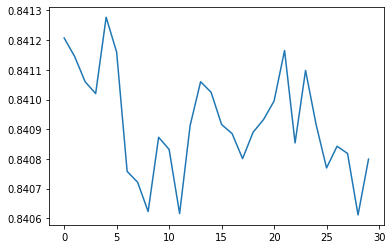

In [ ]:
# plt.plot(history.history['val_mae'])

# modeling v2. LightGBM

In [ ]:
!pip install lightgbm 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1'],
    'learning_rate': 0.0005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 10,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000
}

In [ ]:
gbm = lgb.LGBMRegressor(**hyper_params)

In [ ]:
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
[10273]	valid_0's l1: 0.792373
[10274]	valid_0's l1: 0.792373
[10275]	valid_0's l1: 0.792371
[10276]	valid_0's l1: 0.792369
[10277]	valid_0's l1: 0.792368
[10278]	valid_0's l1: 0.792366
[10279]	valid_0's l1: 0.792362
[10280]	valid_0's l1: 0.792356
[10281]	valid_0's l1: 0.792354
[10282]	valid_0's l1: 0.792352
[10283]	valid_0's l1: 0.79235
[10284]	valid_0's l1: 0.792348
[10285]	valid_0's l1: 0.792346
[10286]	valid_0's l1: 0.792344
[10287]	valid_0's l1: 0.792343
[10288]	valid_0's l1: 0.792341
[10289]	valid_0's l1: 0.79234
[10290]	valid_0's l1: 0.792338
[10291]	valid_0's l1: 0.792339
[10292]	valid_0's l1: 0.79234
[10293]	valid_0's l1: 0.792339
[10294]	valid_0's l1: 0.792337
[10295]	valid_0's l1: 0.792339
[10296]	valid_0's l1: 0.792338
[10297]	valid_0's l1: 0.792338
[10298]	valid_0's l1: 0.792338
[10299]	valid_0's l1: 0.792337
[10300]	valid_0's l1: 0.792335
[10301]	valid_0's l1: 0.792331
[10302]	valid_0's l1: 0.792328
[10303]	valid_0'

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              learning_rate=0.0005, max_bin=512, max_depth=10, metric=['l1'],
              num_iterations=100000, num_leaves=128, objective='regression',
              task='train', verbose=0)

# modeling v3. XGBoost

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb
print(xgboost.__version__)

0.90


In [ ]:
regressor=xgb.XGBRegressor(learning_rate = 0.0005,
                           n_estimators  = 10000,
                           max_depth     = 10,)

regressor.fit(X_train, y_train)

[16:06:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.0005, max_depth=10, n_estimators=10000)

In [ ]:
pred = regressor.predict(X_test)

In [ ]:
MAE = np.sum(np.abs(pred - y_test)) / len(y_test)
MAE

#modeling v4. pycaret

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 24.0 MB/s 
     |████████████████████████████████| 167 kB 66.2 MB/s 
     |████████████████████████████████| 88 kB 9.1 MB/s 
     |████████████████████████████████| 6.8 MB 61.1 MB/s 
     |████████████████████████████████| 141 kB 73.2 MB/s 
     |████████████████████████████████| 1.7 MB 54.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 315 kB 65.6 MB/s 
     |████████████████████████████████| 17.0 MB 57.7 MB/s 
     |████████████████████████████████| 3.3 MB 51.6 MB/s 
     |████████████████████████████████| 2.0 MB 45.9 MB/s 
     |████████████████████████████████| 25.9 MB 1.2 MB/s 
     |████████████████████████████████| 56 kB 5.0 MB/s 
     |████████████████████████████████|

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
X

array([[-0.7898672 ,  0.74773   ,  0.        , ...,  0.        ,
         0.        , -0.07298841],
       [-1.456913  ,  1.2403545 ,  0.        , ...,  0.        ,
         0.        , -0.9401366 ],
       [ 0.79336184, -0.9619668 ,  0.        , ...,  0.        ,
         0.        ,  0.5051104 ],
       ...,
       [ 0.60048115,  0.11021595,  0.        , ...,  0.        ,
         1.        , -1.3737106 ],
       [ 0.7612151 , -0.9619668 ,  0.        , ...,  0.        ,
         1.        ,  1.5167832 ],
       [-1.1354451 ,  0.28408343,  0.        , ...,  0.        ,
         1.        ,  0.36058566]], dtype=float32)

In [ ]:
from pycaret.regression import *
exp_reg101 = setup(data = df_train_processed, target = 'temp', session_id=123) 

,Description,Value
0,session_id,123
1,Target,temp
2,Original Data,"(13635, 20)"
3,Missing Values,False
4,Numeric Features,19
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(9544, 18)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='temp',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='m...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [ ]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8292,1.5423,1.2370,0.9192,0.0496,0.0293,0.167
et,Extra Trees Regressor,0.8567,1.6783,1.2916,0.9121,0.0515,0.0303,1.979
rf,Random Forest Regressor,0.8634,1.7314,1.3111,0.9093,0.0519,0.0306,2.440
gbr,Gradient Boosting Regressor,0.9012,1.8785,1.3647,0.9015,0.0537,0.0319,0.525
knn,K Neighbors Regressor,0.9599,2.0398,1.4245,0.8929,0.0555,0.0339,0.137
dt,Decision Tree Regressor,1.1830,3.2009,1.7865,0.8319,0.0679,0.0416,0.050
omp,Orthogonal Matching Pursuit,1.3066,3.6065,1.8952,0.8109,0.0685,0.0453,0.012
ada,AdaBoost Regressor,1.6102,4.1242,2.0287,0.7838,0.0734,0.0548,0.348
lasso,Lasso Regression,1.4492,4.3421,2.0816,0.7726,0.0724,0.0494,0.013
en,Elastic Net,1.6350,5.1909,2.2767,0.7282,0.0782,0.0558,0.012


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8566,1.6453,1.2827,0.9111,0.0447,0.0303
1,0.7770,1.2831,1.1327,0.9311,0.0400,0.0276
2,0.8466,1.5564,1.2476,0.9186,0.0430,0.0297
3,0.8500,2.2934,1.5144,0.8892,0.1175,0.0291
4,0.8430,1.4873,1.2196,0.9227,0.0418,0.0297
5,0.8420,1.7292,1.3150,0.9008,0.0471,0.0306
6,0.7989,1.4412,1.2005,0.9222,0.0440,0.0293
7,0.8197,1.3814,1.1753,0.9313,0.0397,0.0286
8,0.8409,1.3410,1.1580,0.9321,0.0387,0.0293


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_lightGBM = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9200,1.9439,1.3942,0.8949,0.0484,0.0326
1,0.8409,1.4095,1.1872,0.9243,0.0414,0.0297
2,0.9076,1.7565,1.3253,0.9082,0.0453,0.0318
3,0.9027,2.5389,1.5934,0.8773,0.1185,0.0310
4,0.8798,1.5995,1.2647,0.9168,0.0433,0.0310
5,0.8964,1.9286,1.3887,0.8893,0.0495,0.0325
6,0.8798,1.7167,1.3102,0.9073,0.0479,0.0321
7,0.8575,1.4906,1.2209,0.9258,0.0412,0.0298
8,0.8911,1.5726,1.2540,0.9204,0.0419,0.0312


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
              random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


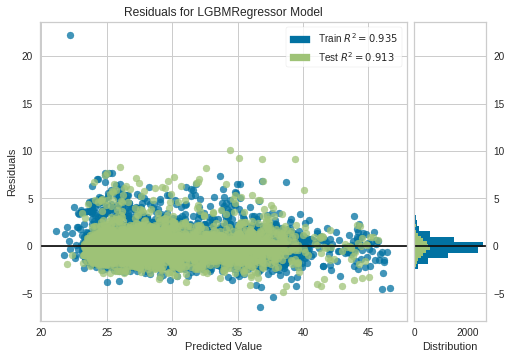

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightGBM)

In [ ]:
evaluate_model(tuned_lightGBM)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
              random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# submission

In [ ]:
test = pd.read_csv('/content/IOT_Test.csv')

In [ ]:
test.columns

Index(['id', 'mac', 'station_name', 'tambon_code', 'tambon_namt',
       'amphur_code', 'amphur_namt', 'province_code', 'province_namt',
       'latitude', 'longitude', 'time', 'humid', 'light', 'pm10', 'pm2.5',
       'rainfall', 'wind_direct', 'wind_speed'],
      dtype='object')

In [ ]:
test = test.drop(columns=['id', 'mac', 'tambon_code', 'tambon_namt',
       'amphur_code', 'amphur_namt', 'province_code', 'province_namt',
       'latitude', 'longitude'])

In [ ]:
df_train_processed.head()

,humid,light,pm10,pm2.5,rainfall,wind_speed,is_wind_direct_Q1,is_wind_direct_Q2,is_wind_direct_Q3,is_wind_direct_Q4,is_บ้านนา_2,is_บ้านนาสะแบง_2,is_บ้านสำโรงเกียรติ_2,is_โรงเรียนท่าข้ามวิทยา,is_โรงเรียนบ้านนา,is_โรงเรียนสรรพวิทยาคม,is_โรงเรียนสามเสนนอก(ประชาราษฎร์อนุกูล),is_โรงเรียนหนองสูงสามัคคีวิทยา_2,hour,temp
0,-0.789867,0.747730,0.0,-1.490018e-16,-0.122106,-0.001287,1,0,0,0,1,0,0,0,0,0,0,0,-0.072988,32.6
1,-1.456913,1.240355,0.0,-1.490018e-16,-0.122106,-0.014498,1,0,0,0,1,0,0,0,0,0,0,0,-0.940137,37.9
2,0.793362,-0.961967,0.0,-1.490018e-16,-0.122106,-0.007342,0,1,0,0,1,0,0,0,0,0,0,0,0.505110,26.4
3,0.905876,-0.961967,0.0,-1.490018e-16,-0.122106,-0.024957,0,1,0,0,1,0,0,0,0,0,0,0,-1.662760,25.6
4,-1.714087,1.095465,0.0,-1.490018e-16,-0.122106,-0.012296,0,0,1,0,1,0,0,0,0,0,0,0,-1.084661,36.2


In [ ]:
test

,station_name,time,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed
0,บ้านนา_2,2022-05-23 04:00:00+07:00,88.9,1.0,NaN,NaN,0.0,180.0,2.3
1,บ้านนา_2,2022-05-12 16:00:00+07:00,85.0,40.0,NaN,NaN,0.3,135.0,1.5
2,บ้านนา_2,2022-06-20 03:00:00+07:00,88.9,7.0,NaN,NaN,0.0,157.5,0.0
3,บ้านนา_2,2022-07-13 13:00:00+07:00,81.9,66.0,NaN,NaN,0.0,135.0,0.2
4,บ้านนา_2,2022-07-05 09:00:00+07:00,64.9,71.0,NaN,NaN,0.0,225.0,2.4
...,...,...,...,...,...,...,...,...,...
3408,โรงเรียนหนองสูงสามัคคีวิทยา_2,2022-06-05 03:00:00+07:00,87.0,0.0,NaN,NaN,0.0,315.0,0.0
3409,โรงเรียนหนองสูงสามัคคีวิทยา_2,2022-05-26 09:00:00+07:00,71.7,81.0,NaN,NaN,0.0,180.0,3.1
3410,โรงเรียนหนองสูงสามัคคีวิทยา_2,2022-05-21 22:00:00+07:00,86.5,2.0,NaN,NaN,0.0,0.0,0.6
3411,โรงเรียนหนองสูงสามัคคีวิทยา_2,2022-07-21 01:00:00+07:00,96.5,0.0,NaN,NaN,0.0,0.0,0.0


In [ ]:
test_temp = transform_df(test)

In [ ]:
test_temp

,humid,light,pm10,pm2.5,rainfall,wind_speed,is_wind_direct_Q1,is_wind_direct_Q2,is_wind_direct_Q3,is_wind_direct_Q4,is_บ้านนา_2,is_บ้านนาสะแบง_2,is_บ้านสำโรงเกียรติ_2,is_โรงเรียนท่าข้ามวิทยา,is_โรงเรียนบ้านนา,is_โรงเรียนสรรพวิทยาคม,is_โรงเรียนสามเสนนอก(ประชาราษฎร์อนุกูล),is_โรงเรียนหนองสูงสามัคคีวิทยา_2,hour
0,0.673281,-0.928935,0.000000,1.869192e-16,-0.137931,-0.017455,0,0,1,0,1,0,0,0,0,0,0,0,-1.652320
1,0.364035,0.200454,0.000000,1.869192e-16,0.156907,-0.020299,0,1,0,0,1,0,0,0,0,0,0,0,0.072389
2,0.673281,-0.755183,0.000000,1.869192e-16,-0.137931,-0.025630,0,1,0,0,1,0,0,0,0,0,0,0,1.653373
3,0.118223,0.953380,0.000000,1.869192e-16,-0.137931,-0.024919,0,1,0,0,1,0,0,0,0,0,0,0,-0.358788
4,-1.229775,1.098173,0.000000,1.869192e-16,-0.137931,-0.017100,0,0,1,0,1,0,0,0,0,0,0,0,-0.933691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3408,0.522623,-0.957894,0.000000,1.869192e-16,-0.137931,-0.025630,0,0,0,1,0,0,0,0,0,0,0,1,1.653373
3409,-0.690576,1.387760,0.000000,1.869192e-16,-0.137931,-0.014612,0,0,1,0,0,0,0,0,0,0,0,1,-0.933691
3410,0.482976,-0.899976,0.000000,1.869192e-16,-0.137931,-0.023497,1,0,0,0,0,0,0,0,0,0,0,1,0.934744
3411,1.275916,-0.957894,0.000000,1.869192e-16,-0.137931,-0.025630,1,0,0,0,0,0,0,0,0,0,0,1,1.365921


In [ ]:
test = test_temp
test

,humid,light,pm10,pm2.5,rainfall,wind_speed,is_wind_direct_Q1,is_wind_direct_Q2,is_wind_direct_Q3,is_wind_direct_Q4,is_บ้านนา_2,is_บ้านนาสะแบง_2,is_บ้านสำโรงเกียรติ_2,is_โรงเรียนท่าข้ามวิทยา,is_โรงเรียนบ้านนา,is_โรงเรียนสรรพวิทยาคม,is_โรงเรียนสามเสนนอก(ประชาราษฎร์อนุกูล),is_โรงเรียนหนองสูงสามัคคีวิทยา_2,hour
0,0.673281,-0.928935,0.000000,1.869192e-16,-0.137931,-0.017455,0,0,1,0,1,0,0,0,0,0,0,0,-1.652320
1,0.364035,0.200454,0.000000,1.869192e-16,0.156907,-0.020299,0,1,0,0,1,0,0,0,0,0,0,0,0.072389
2,0.673281,-0.755183,0.000000,1.869192e-16,-0.137931,-0.025630,0,1,0,0,1,0,0,0,0,0,0,0,1.653373
3,0.118223,0.953380,0.000000,1.869192e-16,-0.137931,-0.024919,0,1,0,0,1,0,0,0,0,0,0,0,-0.358788
4,-1.229775,1.098173,0.000000,1.869192e-16,-0.137931,-0.017100,0,0,1,0,1,0,0,0,0,0,0,0,-0.933691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3408,0.522623,-0.957894,0.000000,1.869192e-16,-0.137931,-0.025630,0,0,0,1,0,0,0,0,0,0,0,1,1.653373
3409,-0.690576,1.387760,0.000000,1.869192e-16,-0.137931,-0.014612,0,0,1,0,0,0,0,0,0,0,0,1,-0.933691
3410,0.482976,-0.899976,0.000000,1.869192e-16,-0.137931,-0.023497,1,0,0,0,0,0,0,0,0,0,0,1,0.934744
3411,1.275916,-0.957894,0.000000,1.869192e-16,-0.137931,-0.025630,1,0,0,0,0,0,0,0,0,0,0,1,1.365921


In [ ]:
test_np = test.to_numpy()

In [ ]:
pred = regressor.predict(test_np)

In [ ]:
# pred = model.predict(test_np)

In [ ]:
!cp /content/IOT_Submit.csv /content/submission.csv

In [ ]:
submit = pd.read_csv('/content/submission.csv')

In [ ]:
submit['temp'] = pred

In [ ]:
submit.to_csv('/content/submission.csv',index=False)

In [ ]:
submit = pd.read_csv('/content/submission.csv')
submit

,id,temp
0,1,24.694311
1,2,25.964306
2,3,25.528807
3,4,28.688856
4,5,34.661266
...,...,...
3408,3409,25.523596
3409,3410,31.870222
3410,3411,26.718563
3411,3412,24.889801


In [ ]:
!kaggle competitions submit -c ss3-hackathon-online-iots-and-robotics -f /content/submission.csv -m "XGBoost"

100% 48.1k/48.1k [00:01<00:00, 26.3kB/s]
Successfully submitted to Hackathon Online: IoTs and Robotics